In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

## Load the Data 
The data can be downloaded at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

#### Peak the first several lines

In [2]:
file = "House_price/train.csv"
N = 10

with open(file) as f:
    cnt = 0
    while cnt <= N:
        for l in f:
            print(l)
            cnt += 1
            
f.close()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice

1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PC


543,20,RL,78,10140,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,1Story,7,5,1998,1999,Hip,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Ex,TA,No,LwQ,144,GLQ,1127,379,1650,GasA,Ex,Y,SBrkr,1680,0,0,1680,1,0,2,0,3,1,Gd,7,Maj1,1,TA,Attchd,1998,Fin,2,583,TA,TA,Y,78,73,0,0,0,0,NA,NA,NA,0,6,2009,WD,Normal,213250

544,120,RH,34,4058,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,TwnhsE,SFoyer,7,5,1998,1998,Gable,CompShg,MetalSd,MetalSd,BrkFace,182,TA,TA,PConc,Gd,TA,Av,GLQ,584,LwQ,139,0,723,GasA,Ex,Y,SBrkr,767,0,0,767,1,0,1,0,1,1,TA,4,Typ,0,NA,Attchd,1998,Fin,1,367,TA,TA,Y,120,40,0,0,0,0,NA,NA,NA,0,6,2007,WD,Normal,133000

545,60,RL,58,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New,Partial,179665

546,50,RL,NA,13837,Pave,NA,IR1,Lvl,AllPub,Corner,G

1087,160,RM,NA,1974,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1973,1973,Gable,CompShg,CemntBd,CmentBd,None,0,TA,TA,CBlock,TA,TA,No,BLQ,334,Unf,0,212,546,GasA,TA,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,6,Typ,0,NA,Attchd,1973,RFn,1,286,TA,TA,Y,120,96,0,0,0,0,NA,NA,NA,0,5,2010,WD,Normal,83500

1088,60,FV,85,10574,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,1082,1082,GasA,Ex,Y,SBrkr,1082,871,0,1953,0,0,2,1,3,1,Gd,9,Typ,1,Gd,Attchd,2005,RFn,3,1043,TA,TA,Y,160,50,0,0,0,0,NA,NA,NA,0,5,2009,WD,Normal,252000

1089,160,RM,24,2522,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7,Maj1,0,NA,Detchd,2004,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,4,2006,WD,Normal,137500

1090,120,FV,37,3316,Pave,Pave,IR1,Lvl,AllPub,Ins

#### Load the data into a pandas DataFrame 

In [3]:
df = pd.read_csv(file)  

#### Some high level inspection 

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape   # get the length and number of columns

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df.describe()   # not useful for categorical variables

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Missing Data

#### Group columns names for later use

In [9]:
target = 'SalePrice'
categorical = [f for f in df.columns if df.dtypes[f] == 'object']
numerical = [f for f in df.columns if df.dtypes[f] != 'object']
numerical.remove('SalePrice')
numerical.remove('Id')

#### Missing summary
Note: here only count number of missing values that have already been recognized as np.nan by python. Go through categorical labels to make sure no missing values (e.g. "untracked", "missing") are recognized as strings first.  

In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


#### Missing Treatment

In [11]:
## treat missing in categorical variables as another category by filling it with "missing"
for c in categorical:
    if df[c].isnull().any():
        df[c] = df[c].fillna('MISSING')

In [12]:
## treat missing in numerical variables by filling it with the average (or other values appropriate)



### Univariant Analysis

#### Dependent Variable

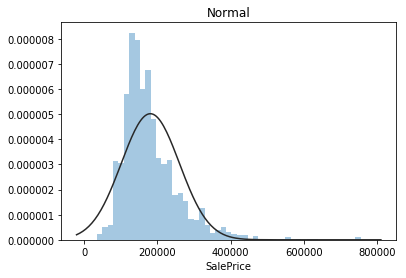

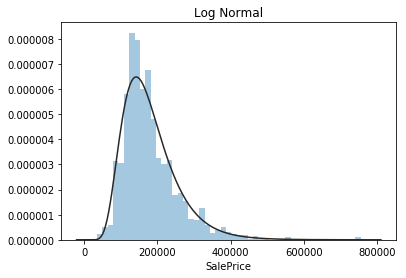

In [13]:
# histogram 
plt.figure(1)
plt.title('Normal')
sns.distplot(df[target], kde=False, fit=st.norm)

plt.figure(2)
plt.title('Log Normal')
sns.distplot(df[target], kde=False, fit=st.lognorm)

In [14]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [15]:
# Test normality with Shapiro test
test_normality = lambda x: st.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df[numerical])
normal = normal.apply(test_normality)
normal        # True means failed to pass normality test

MSSubClass       True
LotFrontage      True
LotArea          True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
BsmtFinSF1       True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
BsmtHalfBath     True
FullBath         True
HalfBath         True
BedroomAbvGr     True
KitchenAbvGr     True
TotRmsAbvGrd     True
Fireplaces       True
GarageYrBlt      True
GarageCars       True
GarageArea       True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
MoSold           True
YrSold           True
dtype: bool

#### Depended Variable Interacts with Independent Variables

/home/anaconda/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


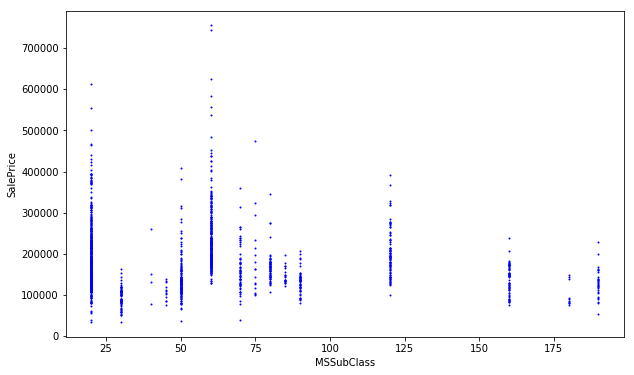

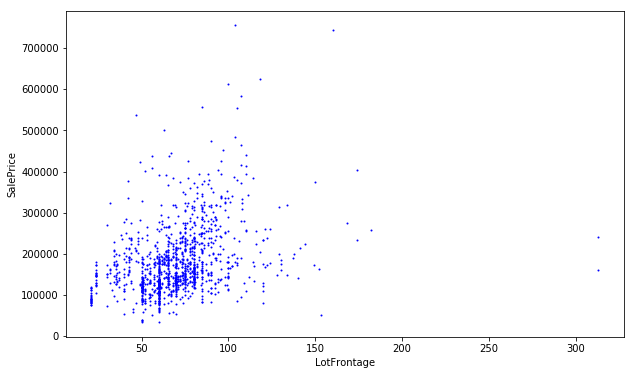

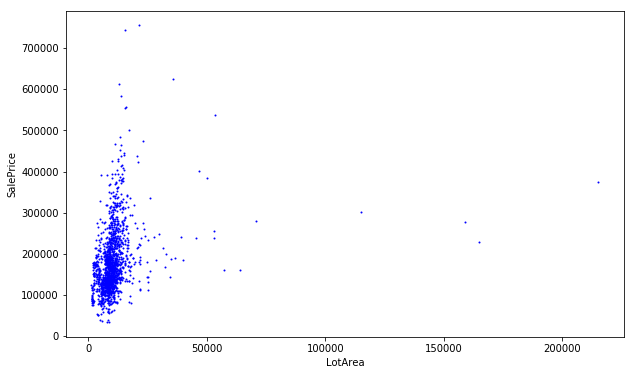

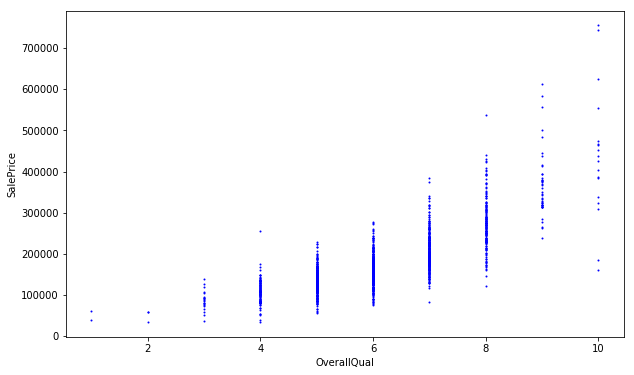

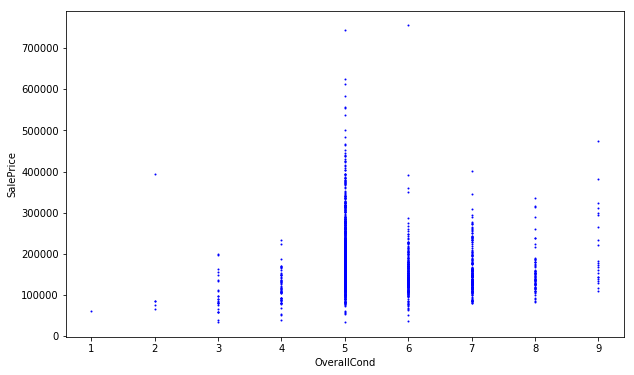

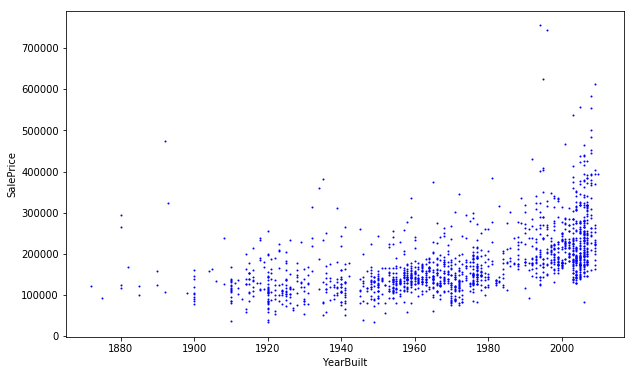

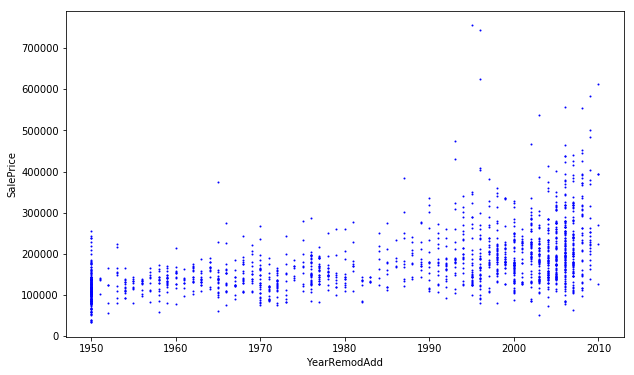

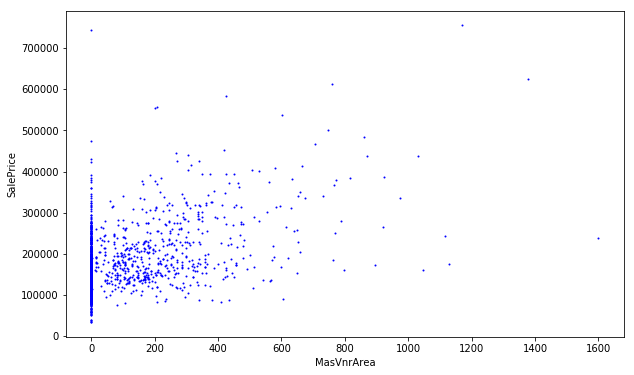

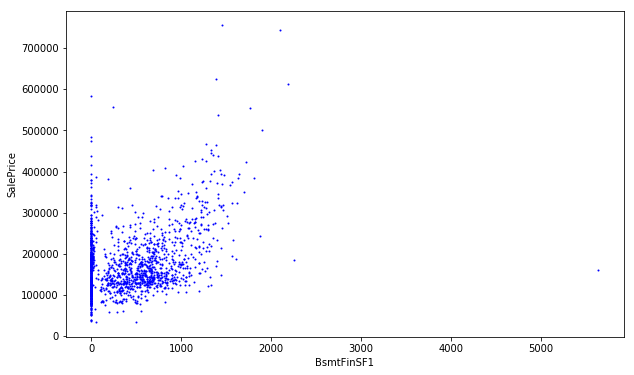

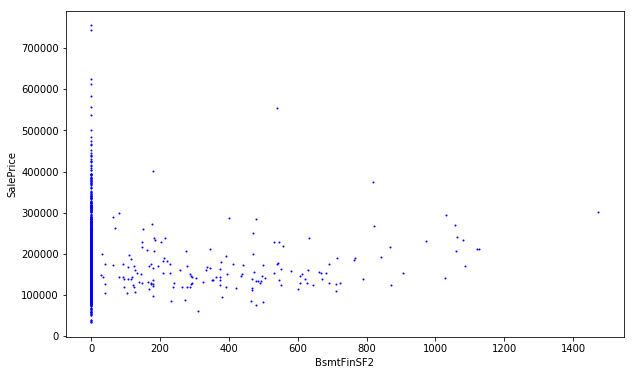

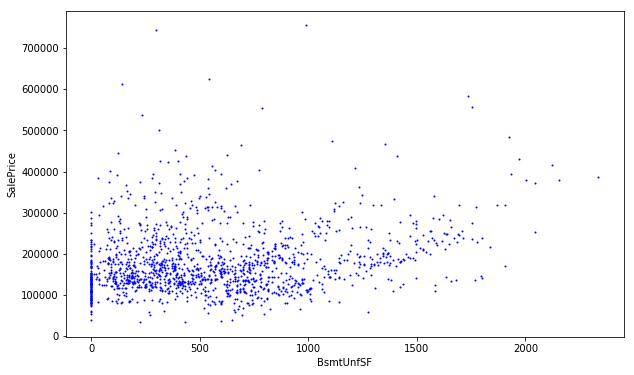

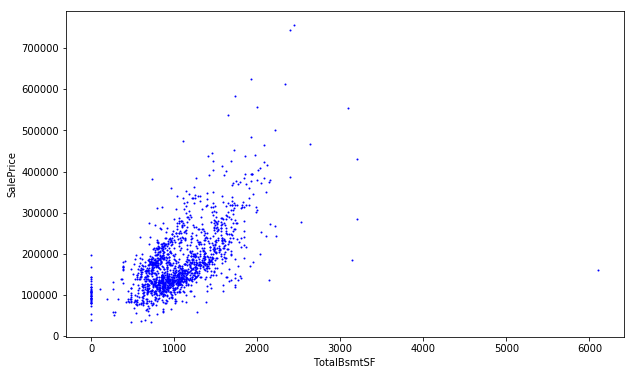

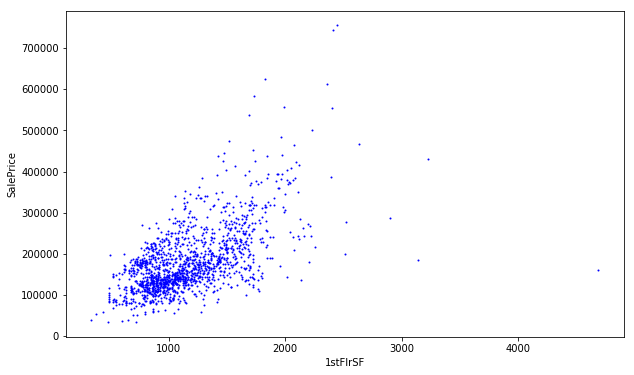

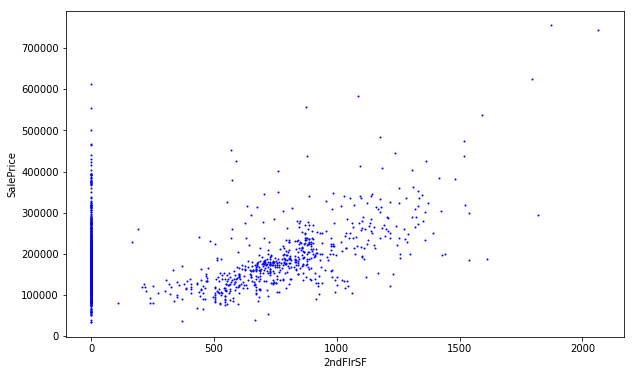

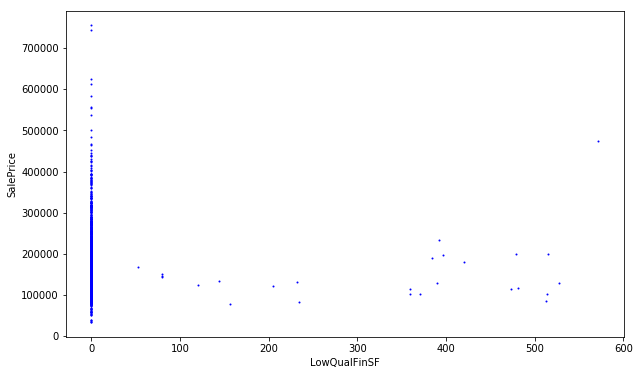

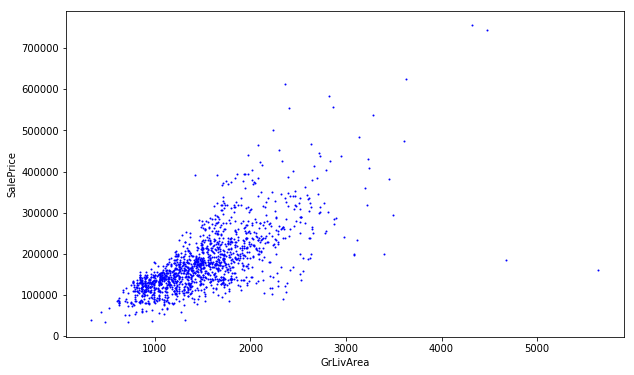

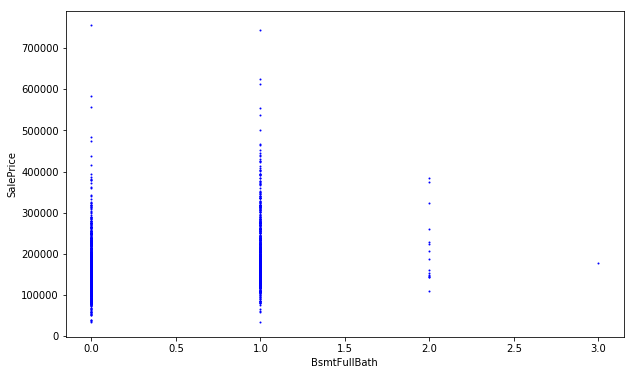

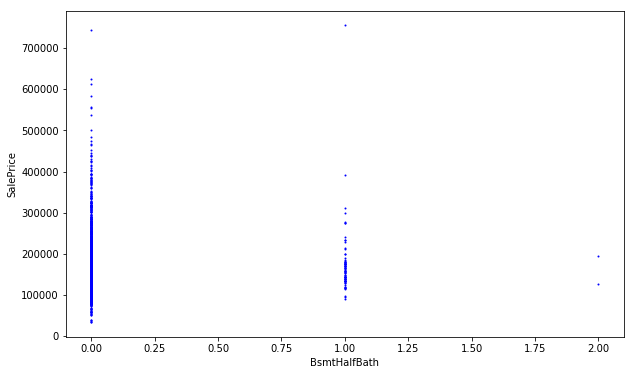

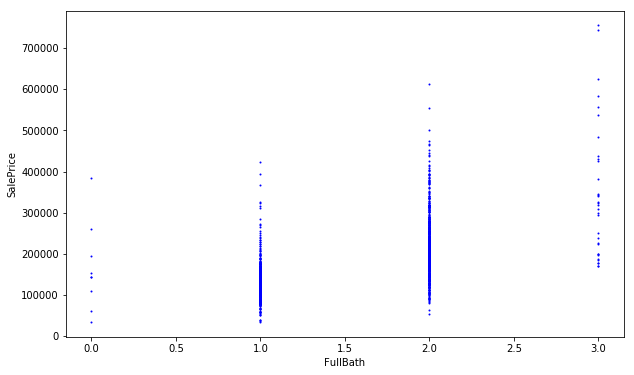

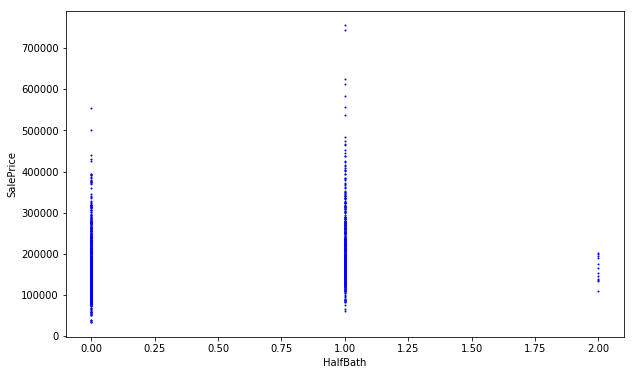

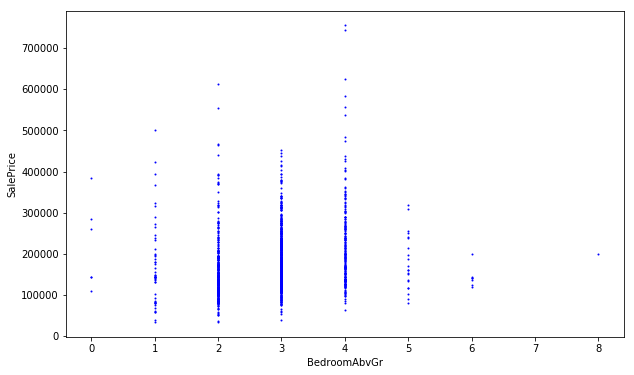

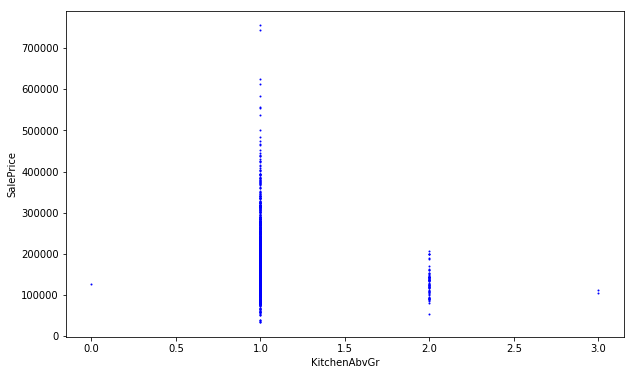

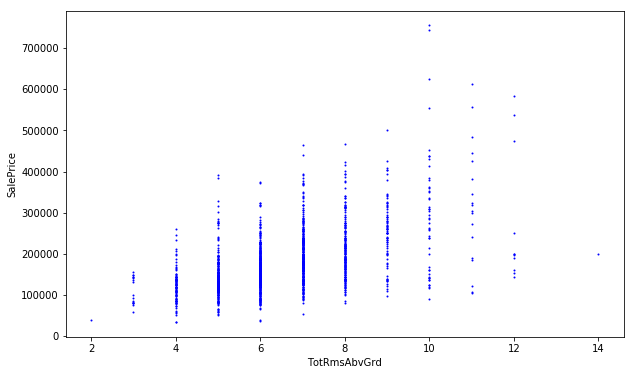

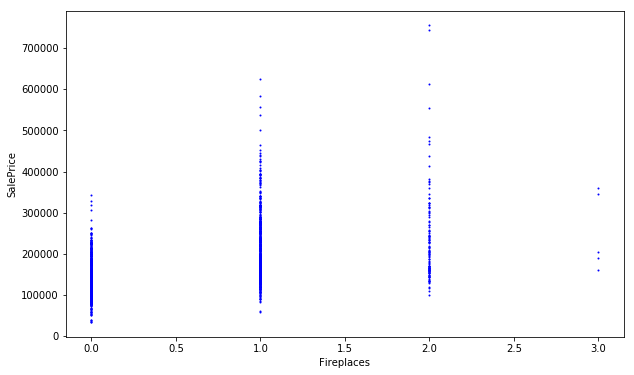

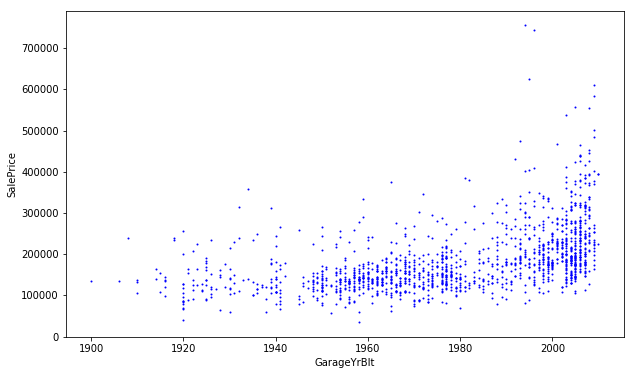

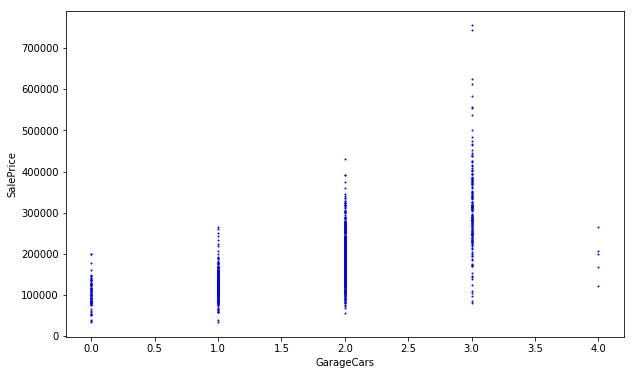

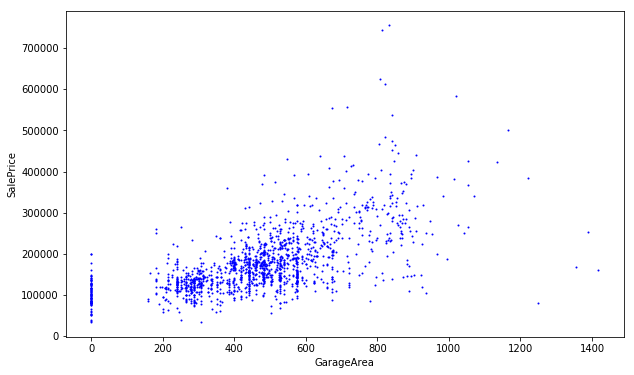

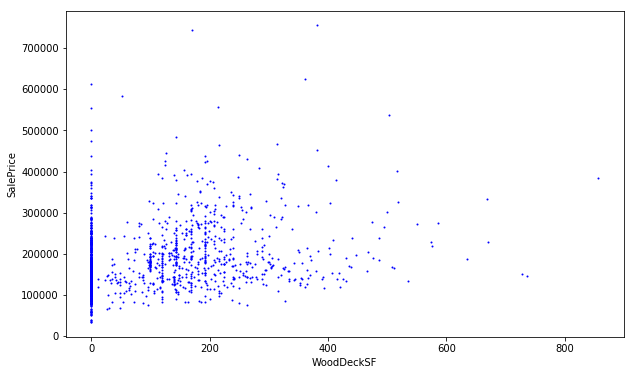

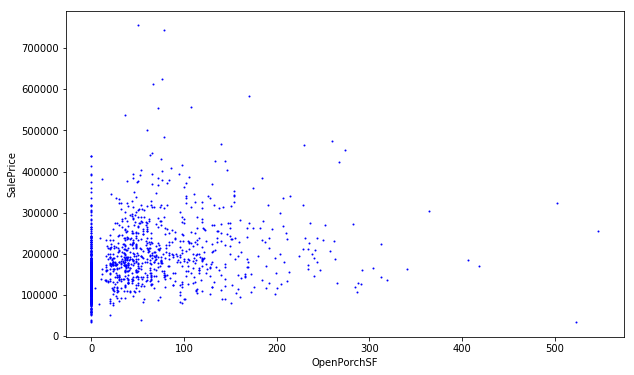

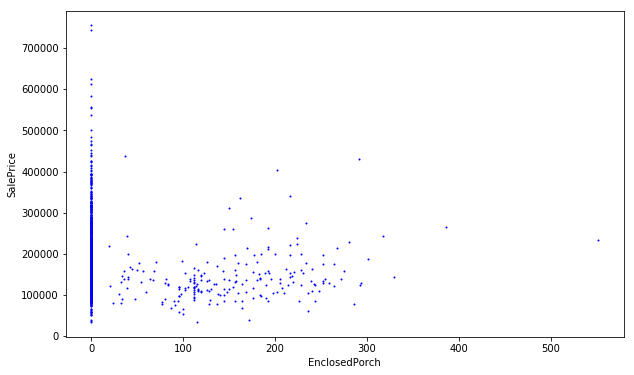

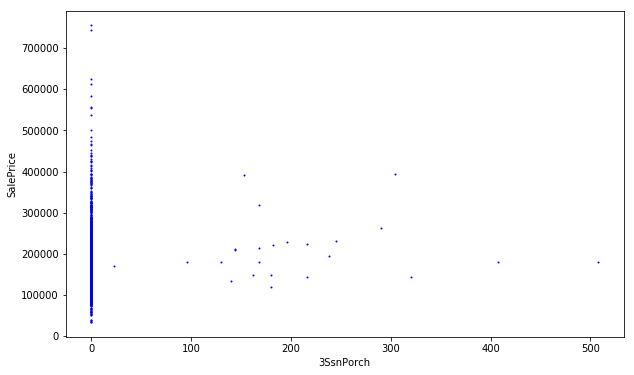

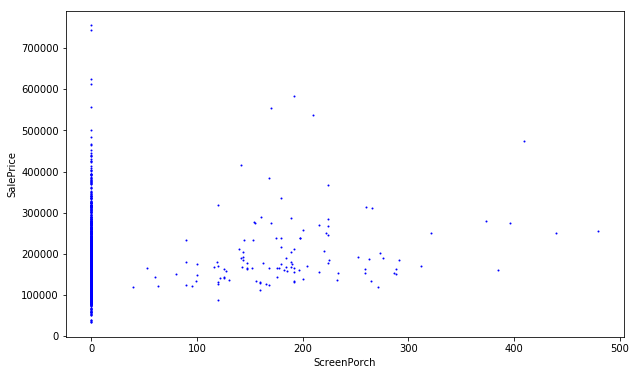

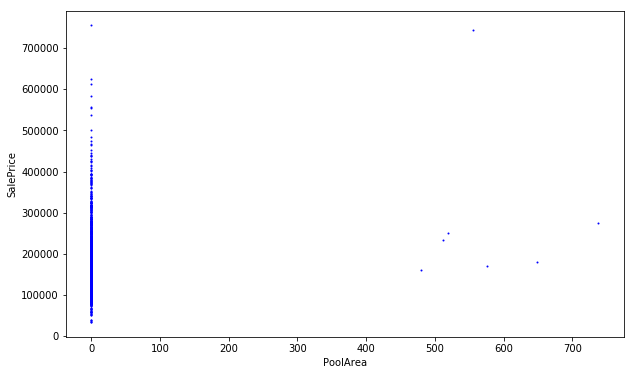

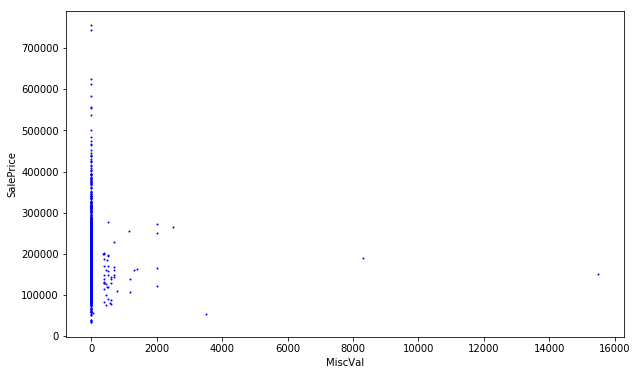

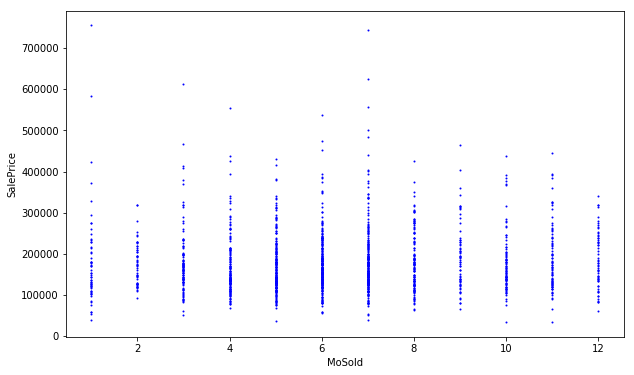

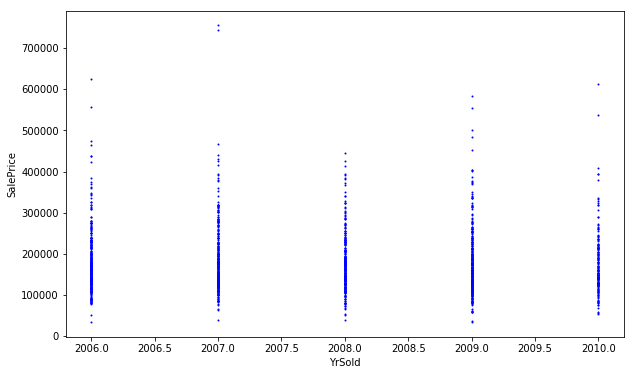

In [16]:
#scatter plots for multiple continuous variables
for var in numerical:
    f, ax = plt.subplots(figsize=(10, 6))   # change size of the output plots; plt.subplots create a figure and a set of subplots. (note the 's')
    plt.scatter(x=df[var], y=df['SalePrice'], s=1, c='blue')           #s: marker size
    plt.xlabel(var)
    plt.ylabel('SalePrice')

/home/anaconda/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


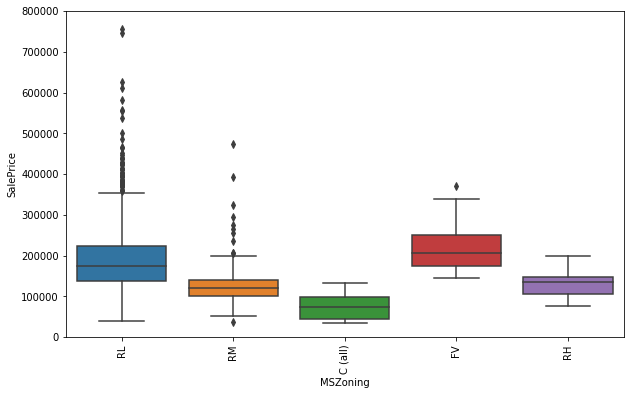

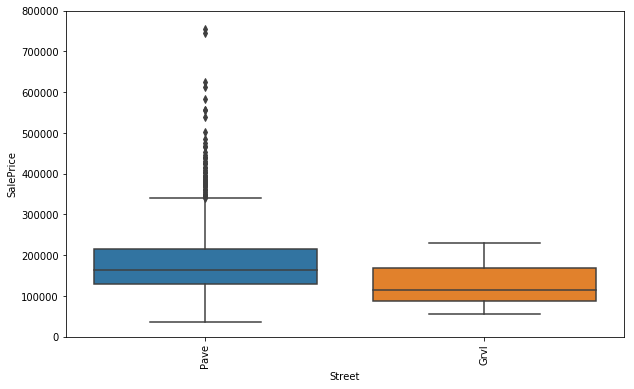

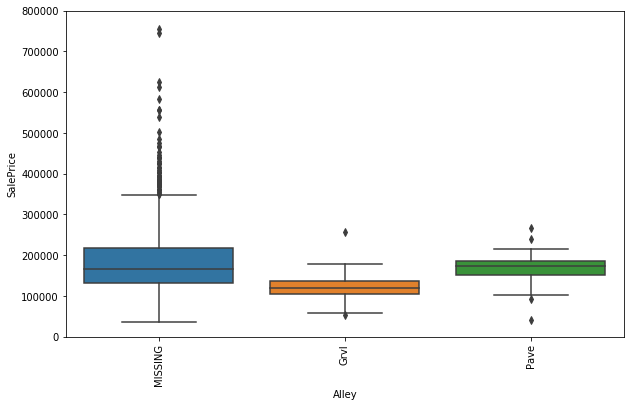

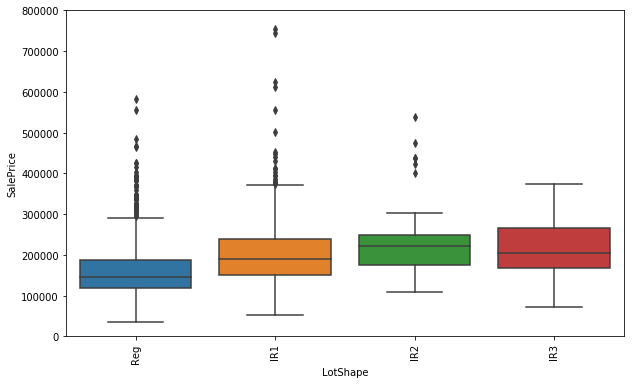

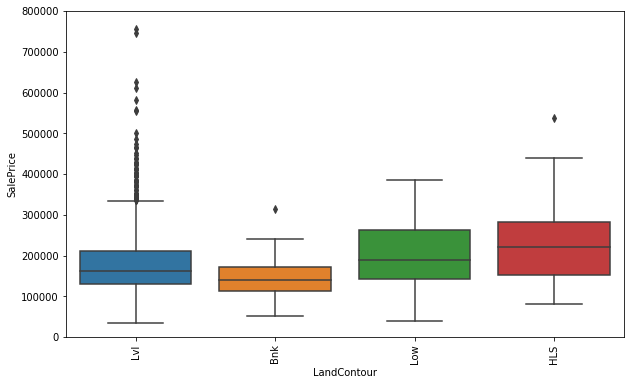

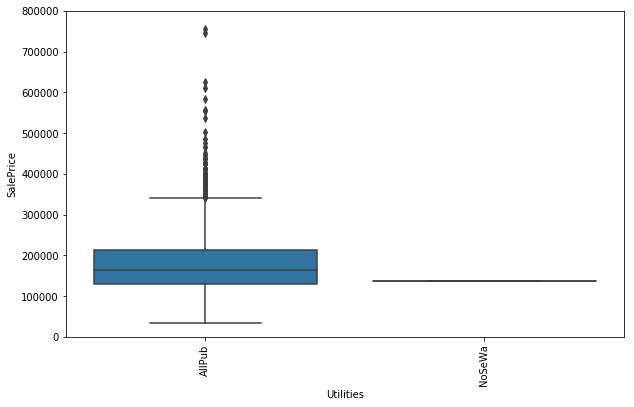

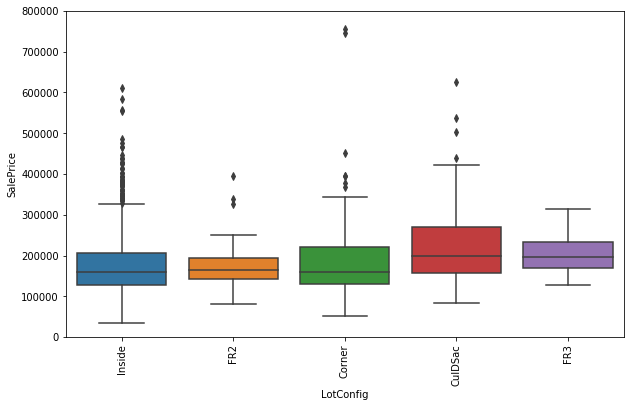

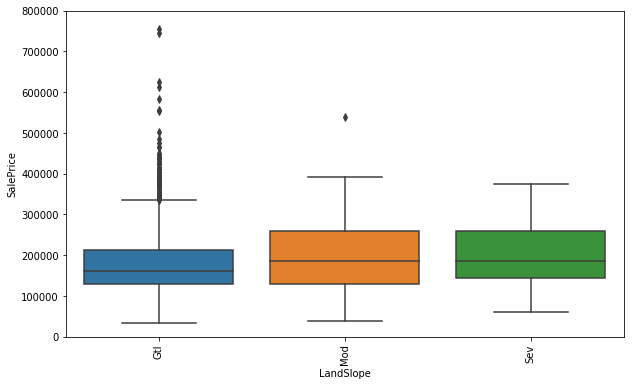

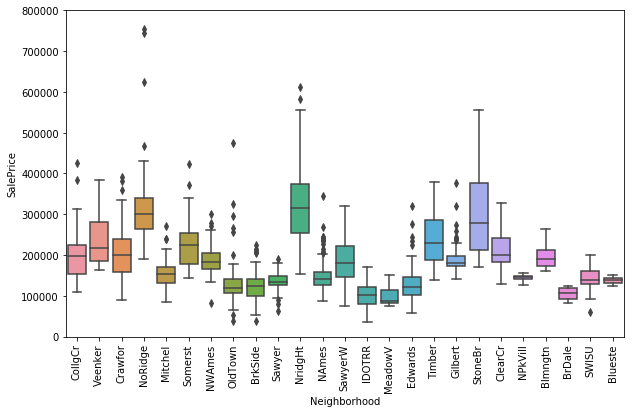

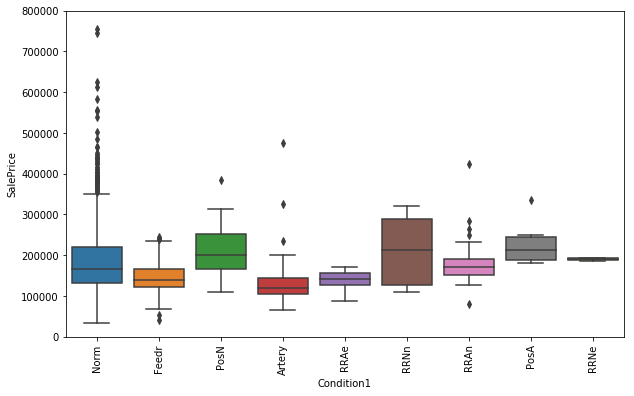

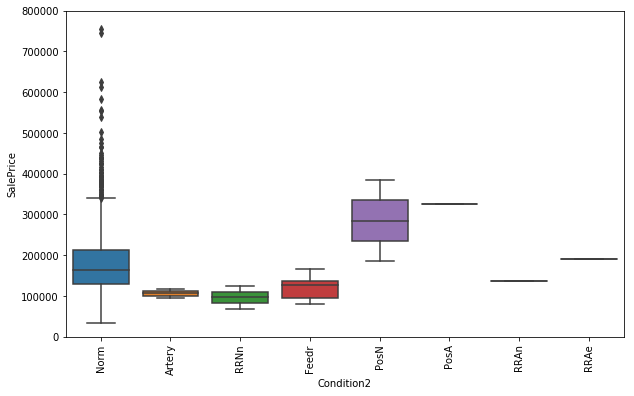

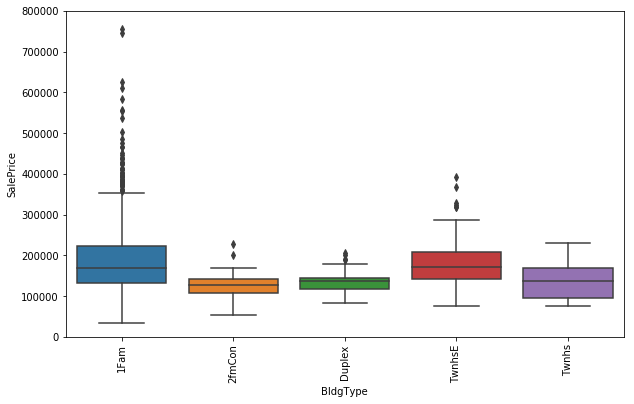

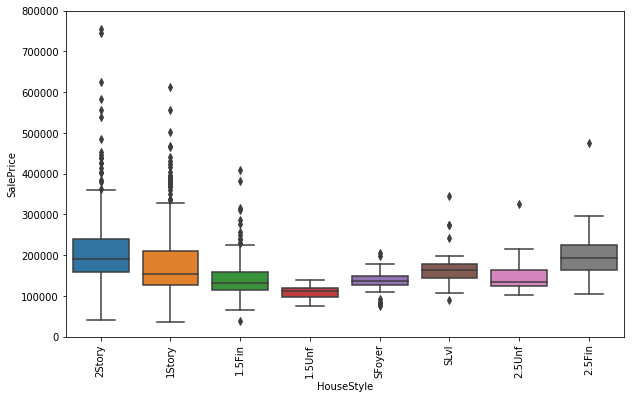

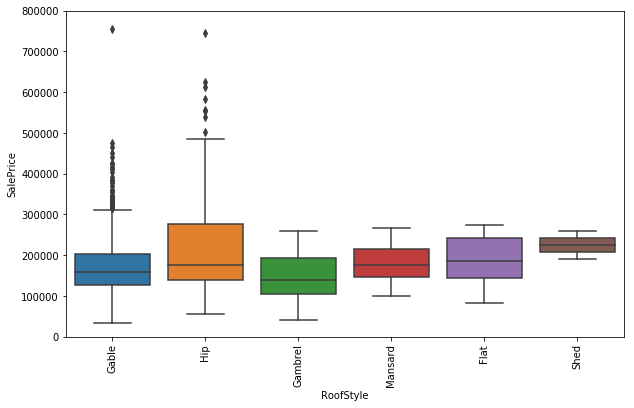

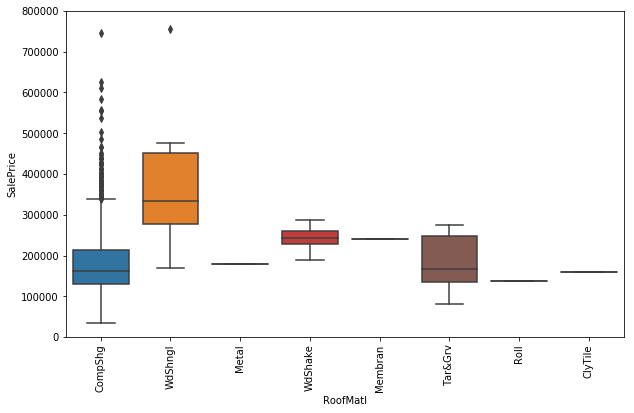

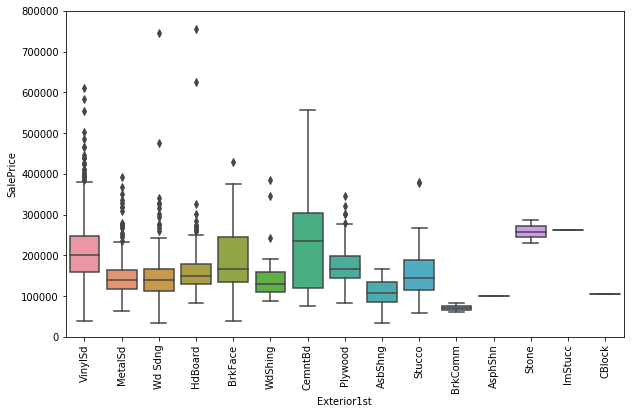

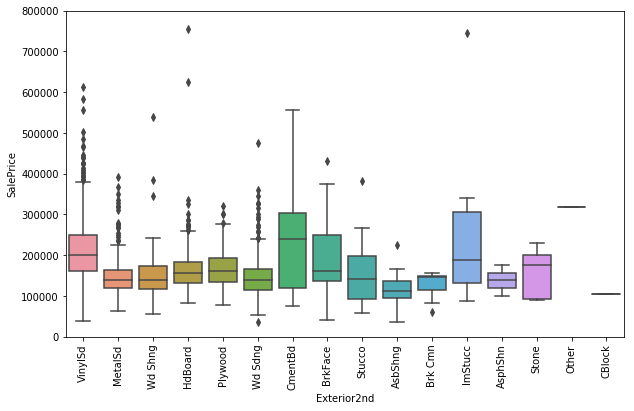

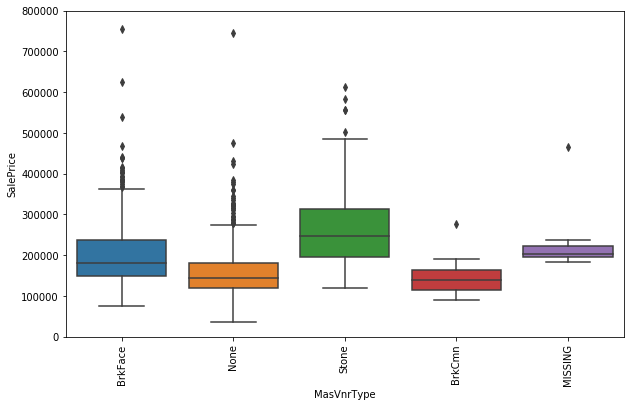

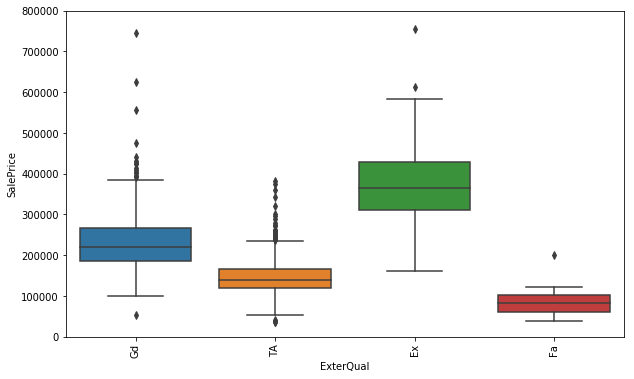

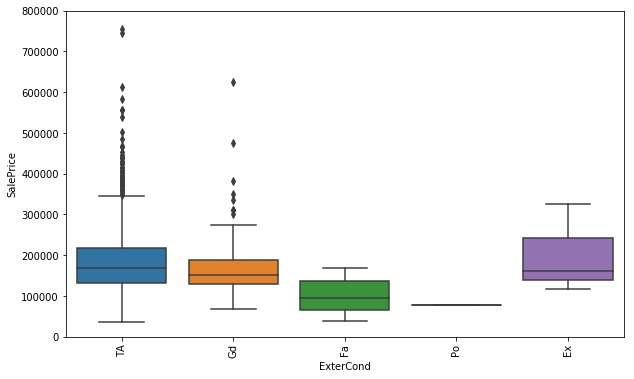

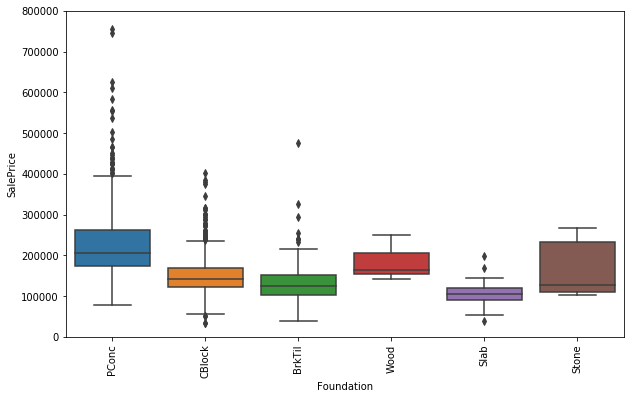

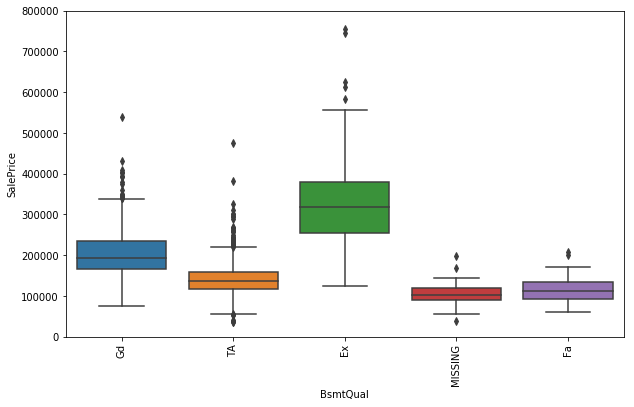

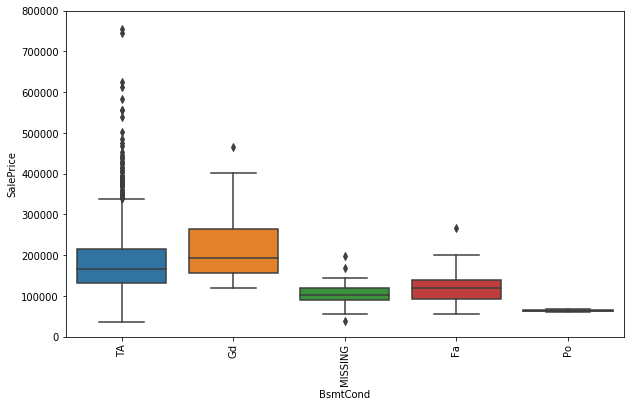

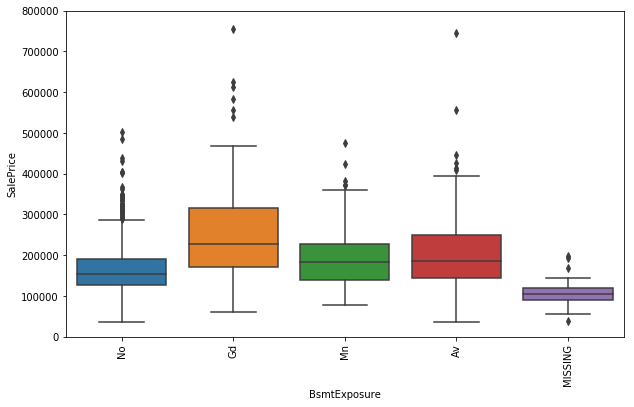

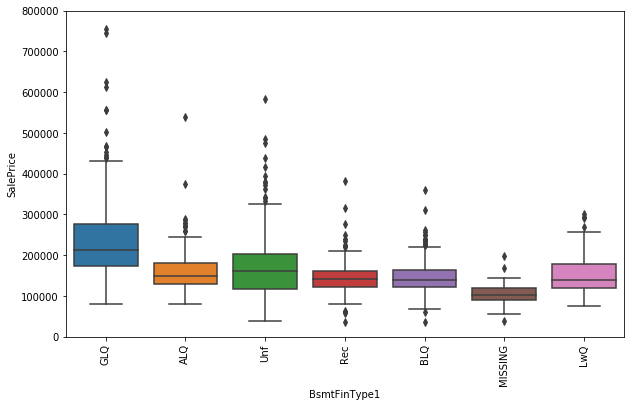

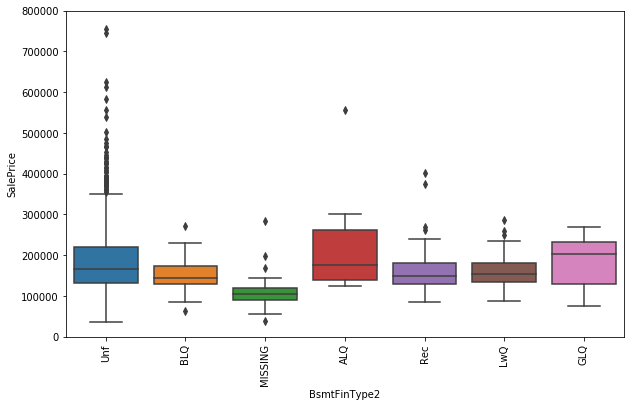

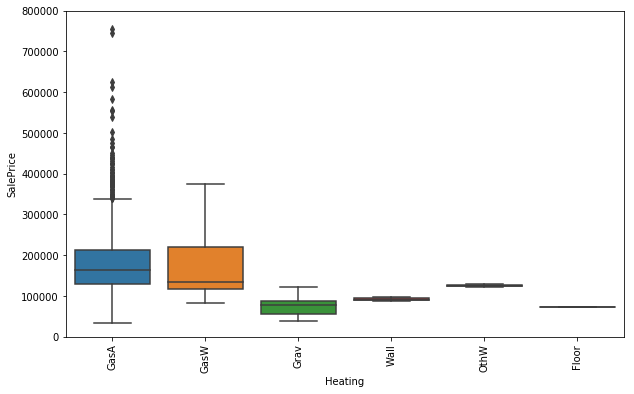

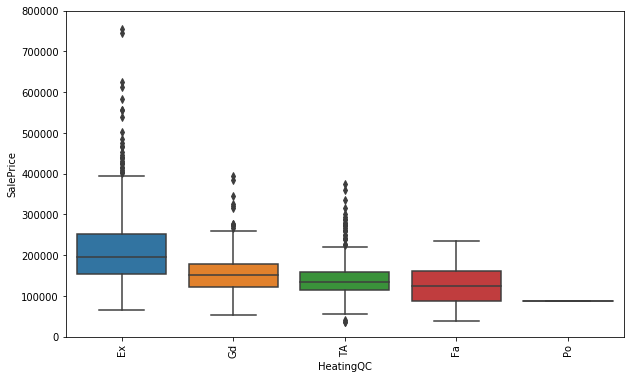

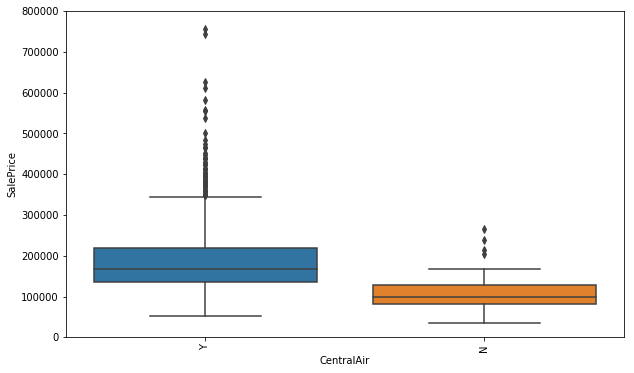

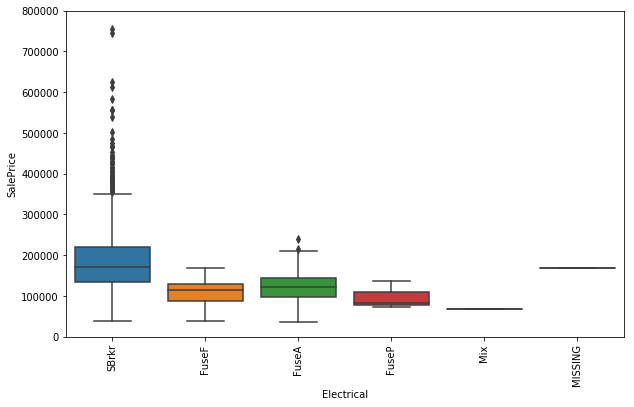

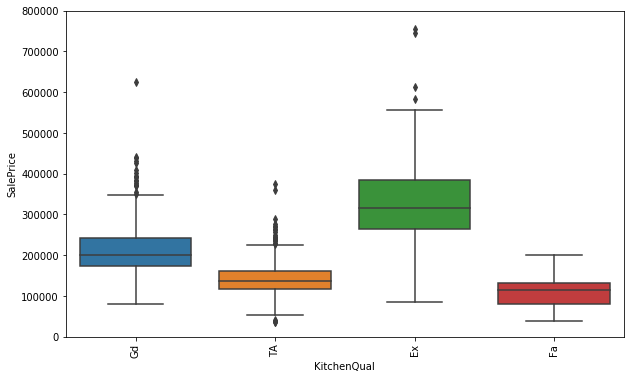

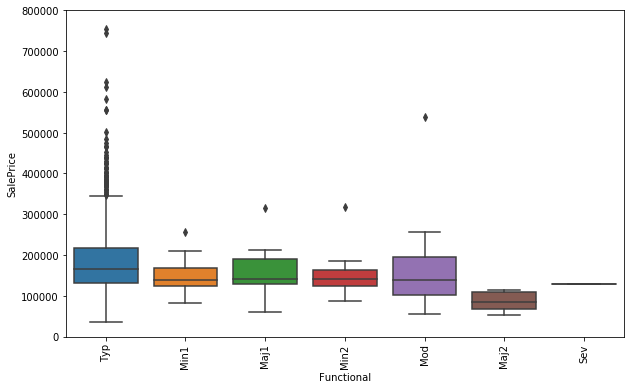

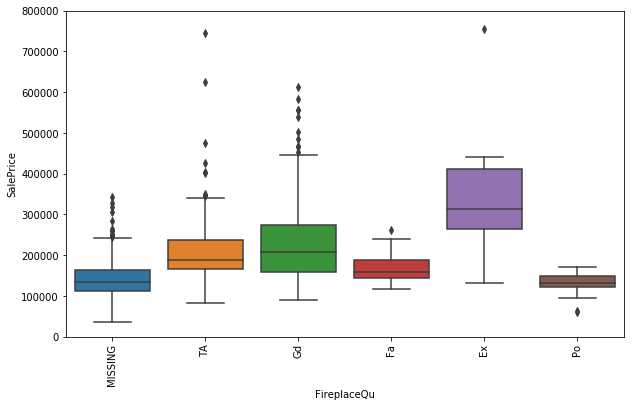

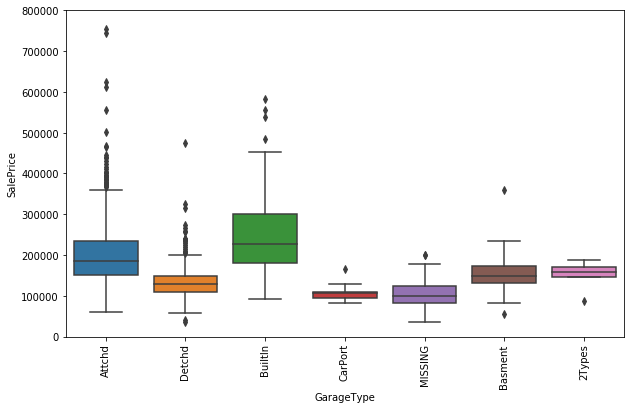

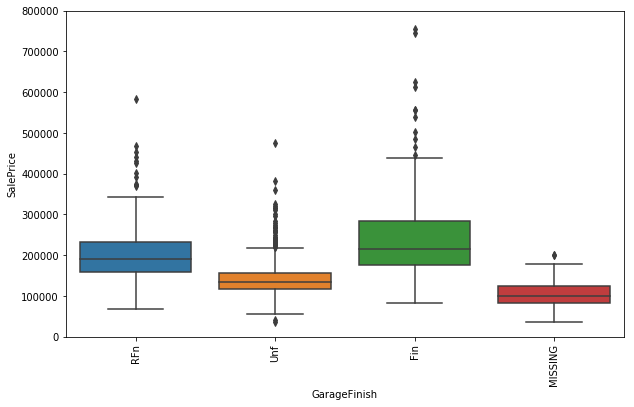

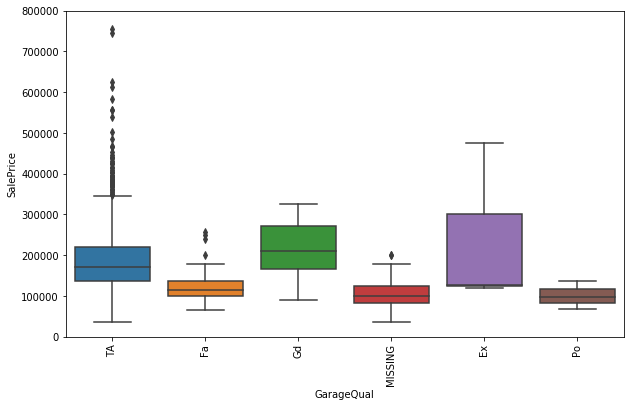

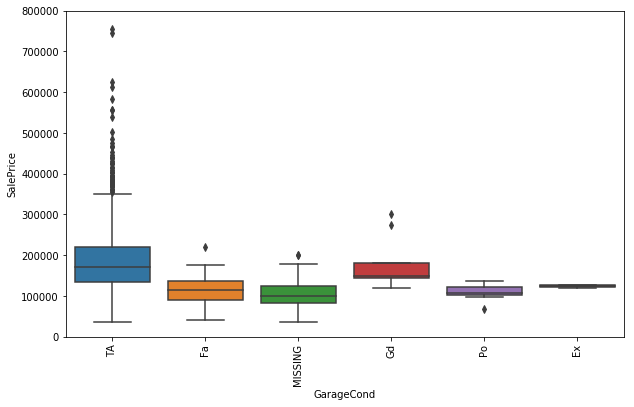

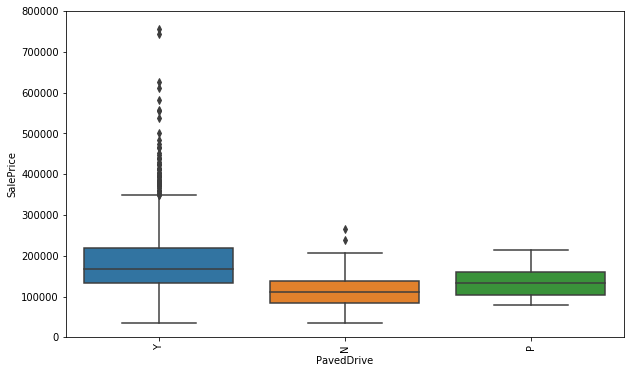

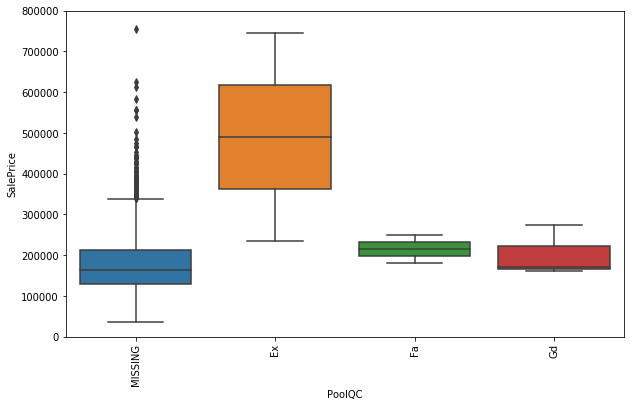

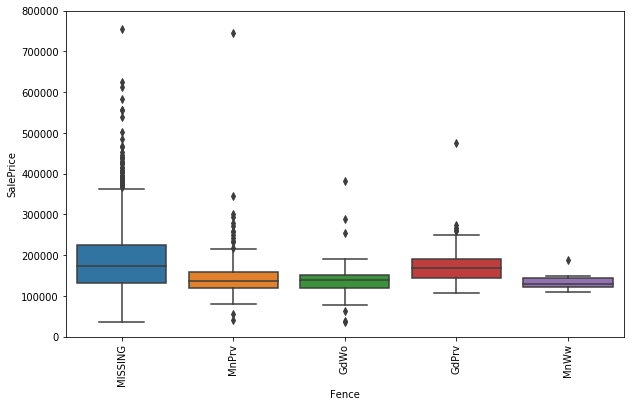

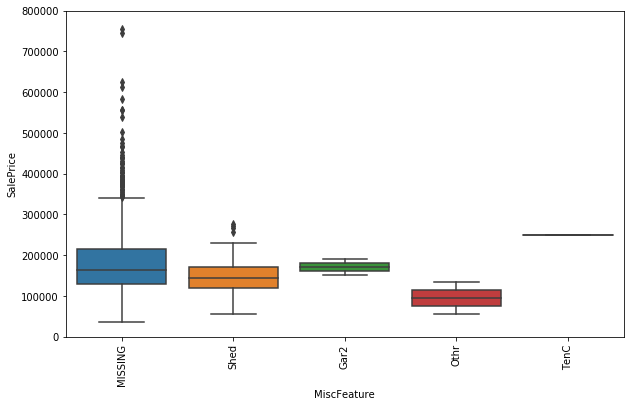

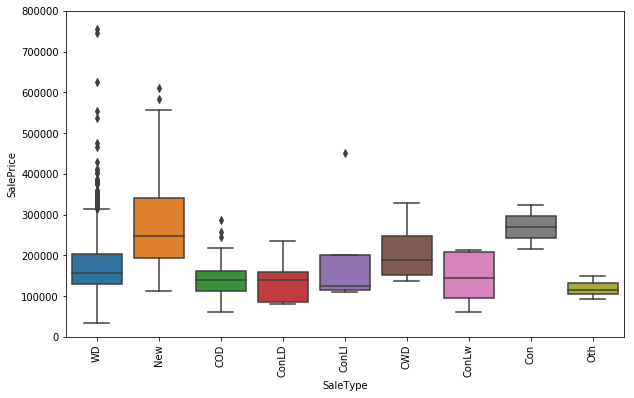

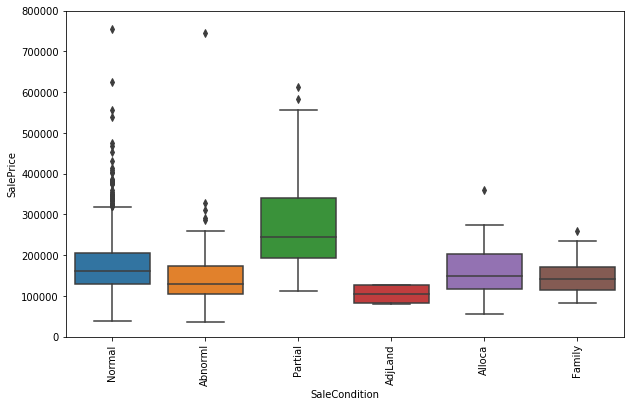

In [17]:
# box plots for multiple categorical variables; (filled NA with "missing" as a new category)
for var in categorical:
    f, ax = plt.subplots(figsize=(10, 6))   # change size of the output plot
    fig = sns.boxplot(x=df[var], y=df['SalePrice'])
    fig.axis(ymin=0, ymax=800000)     # change axis limits
    plt.xticks(rotation=90)  

Box plots of Categorical Variables


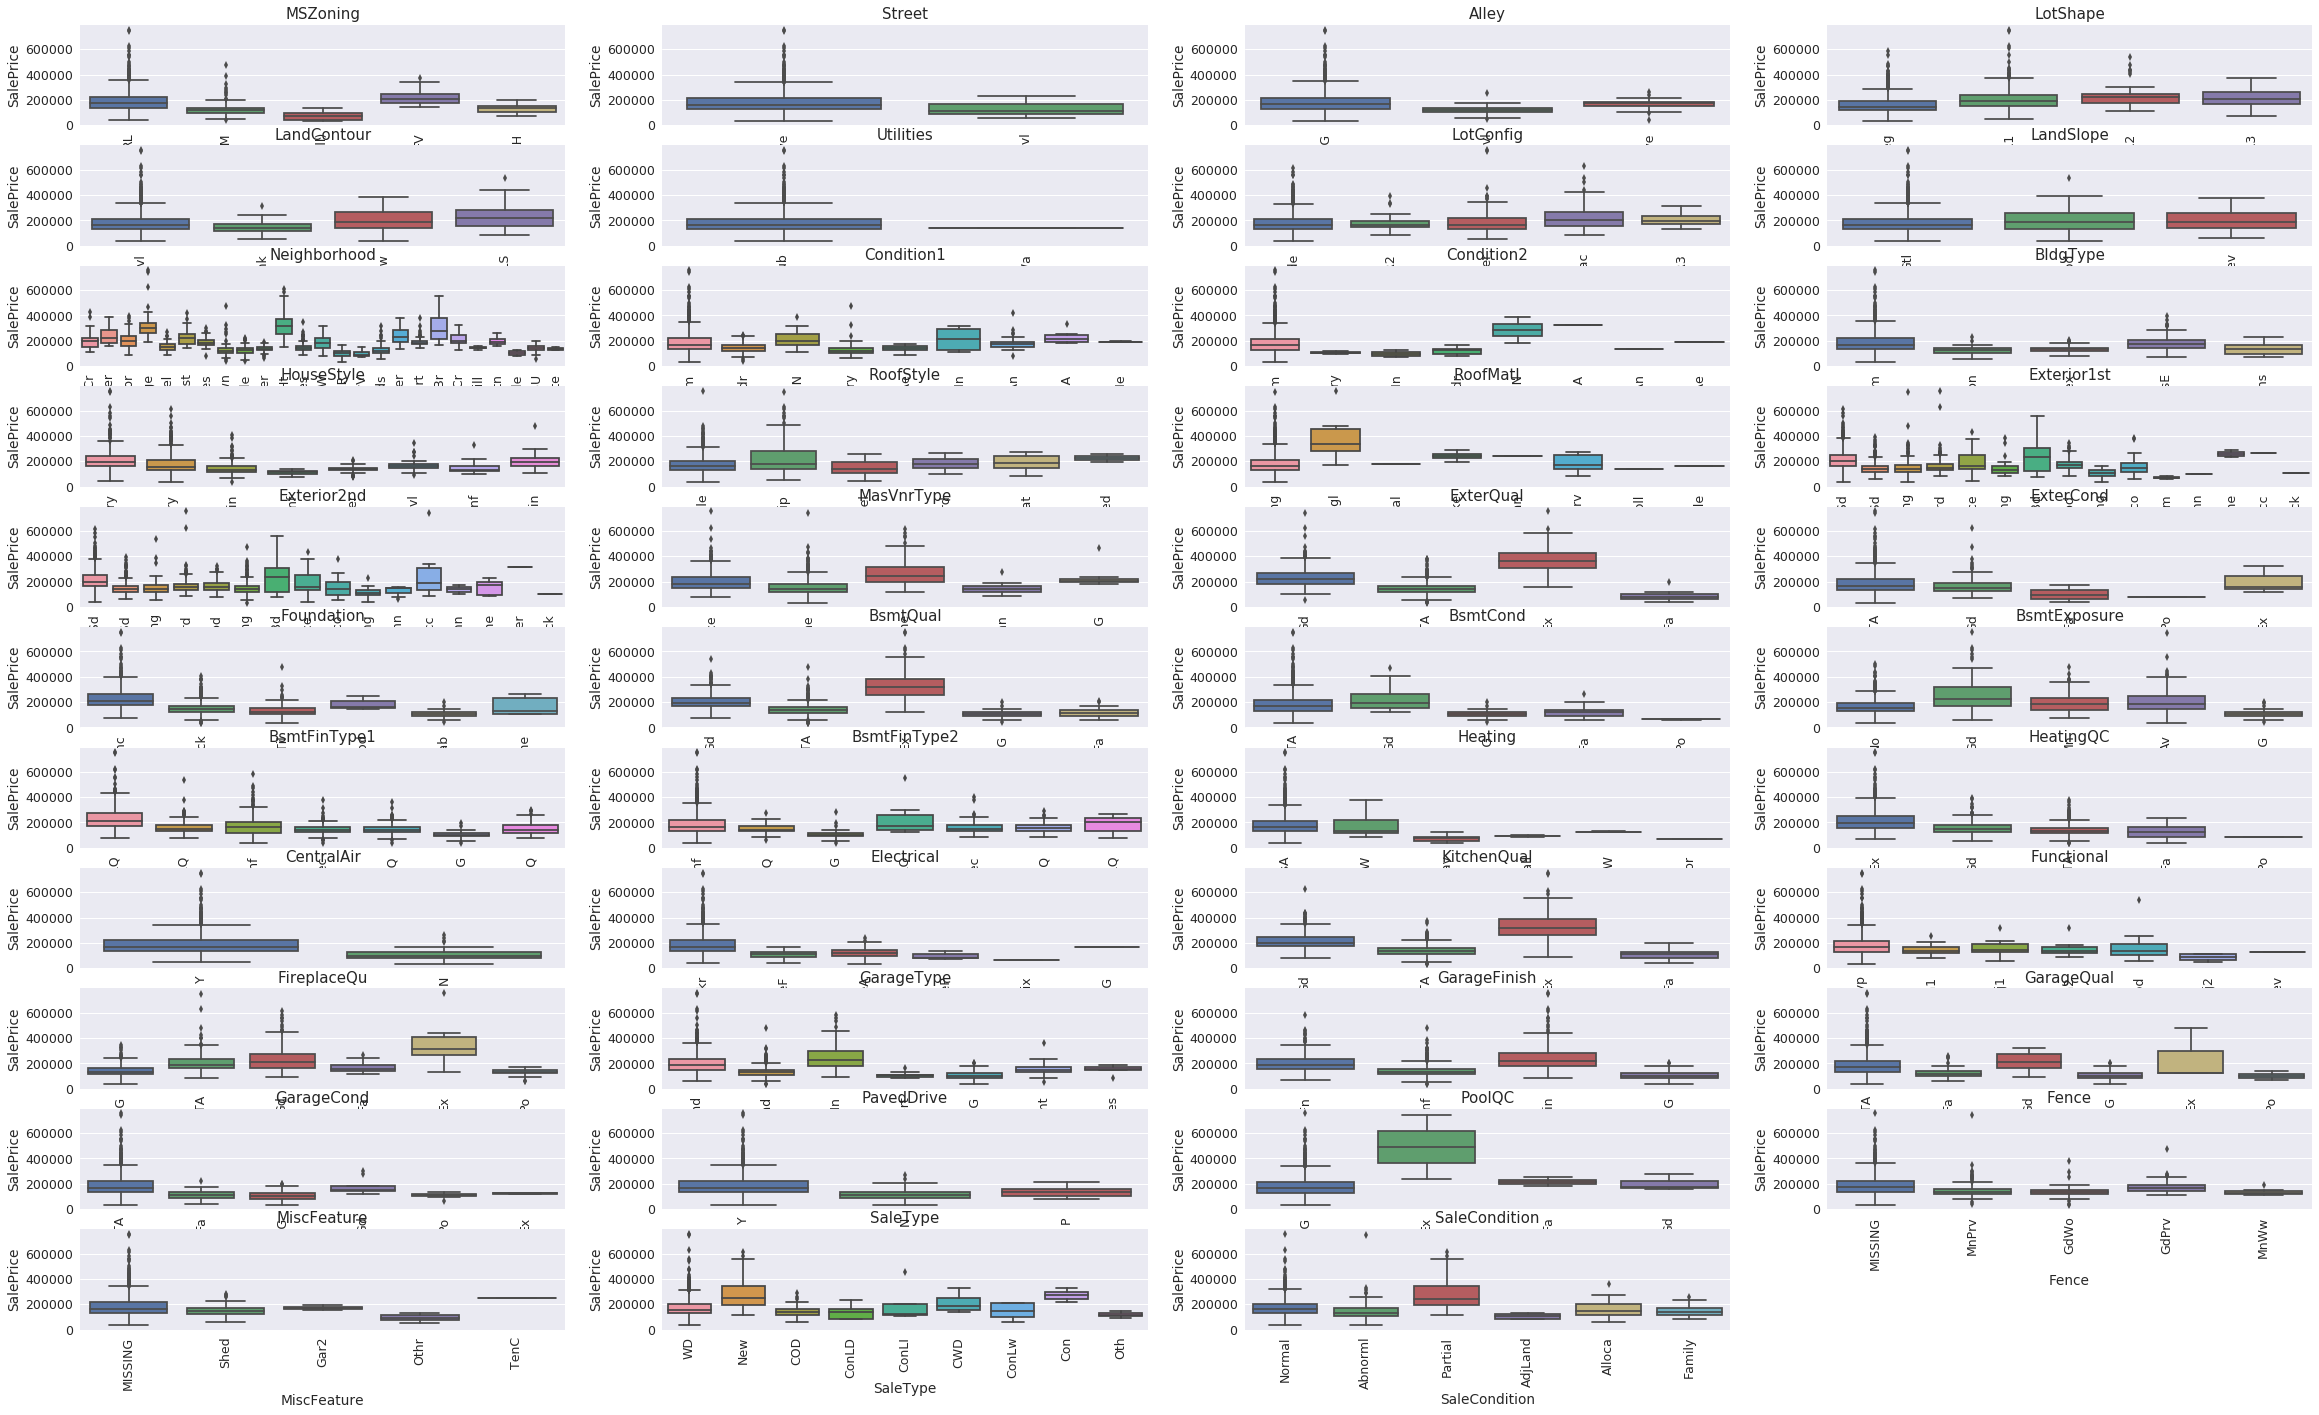

In [81]:
# A different layout of the plots
print('Box plots of Categorical Variables')
plt.figure(figsize=(40, 24))
for i, var in enumerate(categorical):
    plt.subplot(11, 4, i + 1)    #add a subplot to the current figure: subplot(nrows, ncols, index, **kwargs)
    sns.boxplot(x=df[var], y=df['SalePrice'])
    plt.xticks(rotation=90) 
    plt.title(var)

### Bivariant Analysis

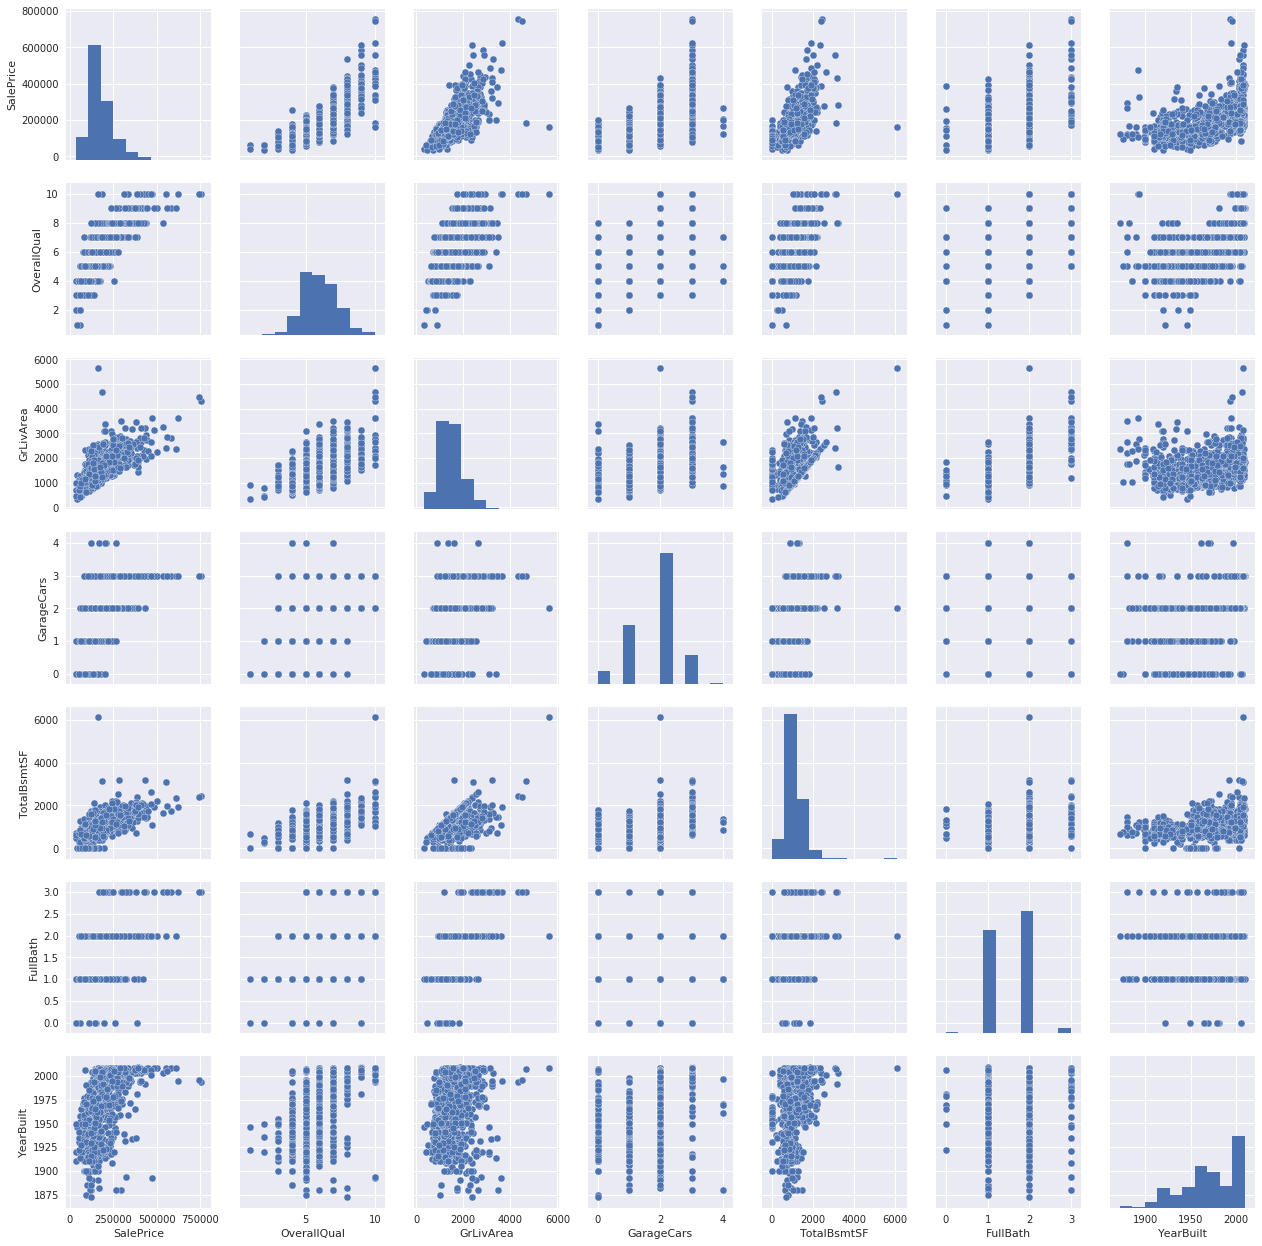

In [18]:
#Pair-wise scatterplots
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)  # sns.pairplot(iris, hue="species") plot by hue (dependent variable) is very powerful if dependent variable is categorical

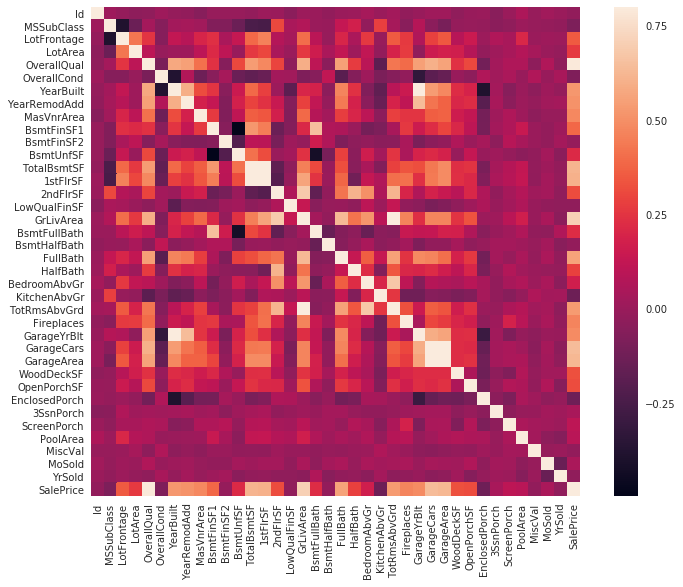

In [19]:
#correlation matrix and heatmap 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

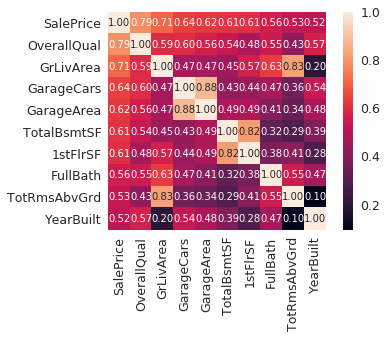

In [20]:
# correlation matrix and heatmap of top correlated variables
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

/home/anaconda/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


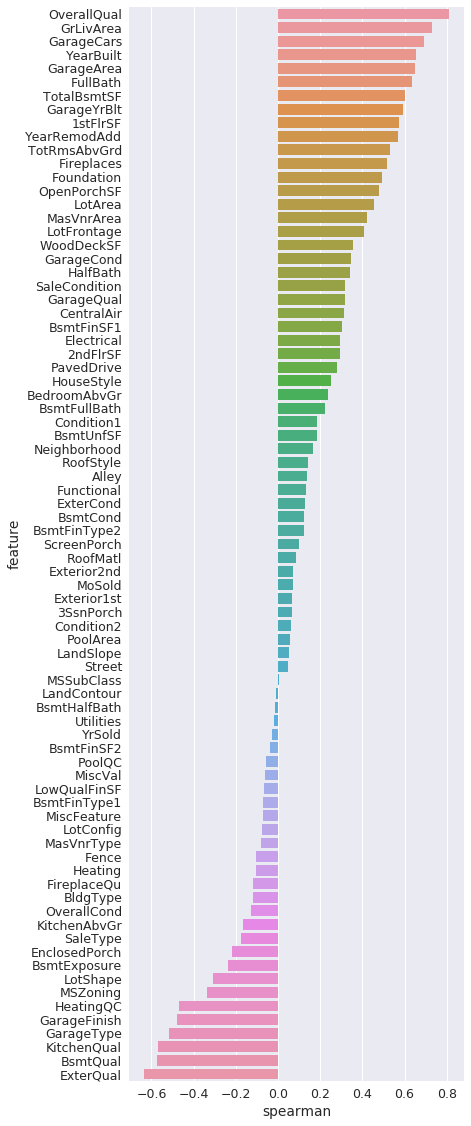

In [21]:
def spearman(frame, features, target_var):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame[target_var], 'spearman') for f in features]
    spr = spr.sort_values('spearman', ascending=False)
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
spearman(df, numerical + categorical, target)

### Data Transformation

#### Select

In [32]:
#df['LotShape']
#df.LotShape
#df[['LotShape', 'OverallQual']]
#df.loc[:, ['LotShape', 'OverallQual']]
df.iloc[0:10, 1:3]

,MSSubClass,MSZoning
0,60,RL
1,20,RL
2,60,RL
3,70,RL
4,60,RL
5,50,RL
6,20,RL
7,60,RL
8,50,RM
9,190,RL


#### Filter 

In [65]:
df[(df['OverallQual']>=8) & (df['YrSold']>=2010)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,high_Qual
27,28,20,RL,98.0,11478,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,MISSING,MISSING,0,5,2010,WD,Normal,306000,1
45,46,120,RL,61.0,7658,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,MISSING,MISSING,0,2,2010,WD,Normal,319900,1
157,158,60,RL,92.0,12003,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,MISSING,MISSING,0,5,2010,New,Partial,269500,1
240,241,20,FV,75.0,9000,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,MISSING,MISSING,0,4,2010,WD,Normal,262500,1
272,273,60,RL,92.0,11764,Pave,MISSING,IR1,Lvl,AllPub,...,MISSING,MISSING,MISSING,0,4,2010,WD,Normal,290000,1
340,341,60,RL,85.0,14191,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,MISSING,MISSING,0,4,2010,WD,Normal,202900,1
378,379,20,RL,88.0,11394,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,MISSING,MISSING,0,6,2010,New,Partial,394432,1
385,386,120,RL,43.0,3182,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,MISSING,MISSING,0,4,2010,WD,Normal,192000,1
470,471,120,RL,NaN,6820,Pave,MISSING,IR1,Lvl,AllPub,...,MISSING,MISSING,MISSING,0,6,2010,WD,Normal,212000,1
539,540,20,RL,NaN,11423,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,MnPrv,Shed,2000,5,2010,WD,Normal,272000,1


In [42]:
#df[df['OverallQual']==10, 'Id'] is invalid!!!
#df[df['OverallQual']==10]['Id']
df.loc[df['OverallQual']==10, 'Id']

58        59
185      186
224      225
389      390
440      441
515      516
523      524
583      584
591      592
691      692
825      826
994      995
1169    1170
1182    1183
1243    1244
1298    1299
1373    1374
1442    1443
Name: Id, dtype: int64

####  Summarize

In [44]:
df['MSZoning'].value_counts()   # good for categorical variables

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [45]:
df['MSZoning'].nunique()

5

In [66]:
df.groupby(['MSZoning', 'Street']).mean()['SalePrice']

MSZoning  Street
C (all)   Grvl       68496.500000
          Pave       76035.875000
FV        Pave      214014.061538
RH        Pave      131558.375000
RL        Grvl      178050.000000
          Pave      191038.849303
RM        Grvl      110000.000000
          Pave      126392.023041
Name: SalePrice, dtype: float64

In [54]:
df.groupby('MSZoning').agg(['mean', 'count'])['SalePrice']

,mean,count
MSZoning,,
C (all),74528.000000,10
FV,214014.061538,65
RH,131558.375000,16
RL,191004.994787,1151
RM,126316.830275,218


In [70]:
df.groupby('MSZoning').agg({'SalePrice':['mean', 'count'], 'LotArea':['mean', 'sum']})

SalePrice             LotArea          
                   mean count          mean       sum
MSZoning                                             
C (all)    74528.000000    10   9501.300000     95013
FV        214014.061538    65   6638.861538    431526
RH        131558.375000    16   7380.062500    118081
RL        191004.994787  1151  11571.814075  13319158
RM        126316.830275   218   6379.775229   1390791

#### Join

In [ ]:
#pd.merge(adf, bdf, how='left', on='x1')   # 'how' can choose from 'left', 'right', 'inner', 'outer' 

#### Mutate

In [71]:
df['age'] = 2019 - df['YearBuilt'] 

In [55]:
df['high_Qual'] = np.where(df['OverallQual']>=5, 1, 0)

In [77]:
df['Collg_neighbor'] = df['Neighborhood'].apply(lambda x: 1 if 'Collg' in x else 0)